In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from distfit import distfit
import scipy
from scipy.stats import loggamma
from scipy.stats import t
import matplotlib.pyplot as plt

In [ ]:
#importing data
df=pd.ExcelFile("C:\\Users\\rehue\\Downloads\\Data Katastropik.xlsx")
df1=pd.read_excel(df, "Leukemia")
df1
df2=pd.read_excel(df, "Haemophillia")
df2
df3=pd.read_excel(df, "Thalassaemia")
df3
df4=pd.read_excel(df, "Stroke")
df4
df5=pd.read_excel(df, "Jantung")
df5
df6=pd.read_excel(df, "Gagal Ginjal")
df6
df7=pd.read_excel(df, "Kanker")
df7
df8=pd.read_excel(df, "Sirosis Hepatitis")
male=pd.DataFrame(pd.concat([df2["age male"] , df3["age male"], df4["age male"], df5["age male"], df6["age male"], df7["age male"], df8["age male"]],ignore_index=True))
female=pd.DataFrame(pd.concat([df2["age female"] , df3["age female"], df4["age female"], df5["age female"], df6["age female"], df7["age female"], df8["age female"]],ignore_index=True))



In [ ]:
#preprocessing for distribution fitting
male=pd.DataFrame.dropna(male, axis=0)
female=pd.DataFrame.dropna(female, axis=0)

In [ ]:
#converting 'age' to integer
male=male.astype('int')
female=female.astype('int')

In [ ]:
#initializing distfit
dist = distfit(todf=True)


In [ ]:
#determining the best fitting distribution for age of male patient
dist.fit_transform(male["age male"])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00143969] [loc=55.762 scale=15.885]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00985937] [loc=0.000 scale=55.762]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00985937] [loc=-17179869184.000 scale=17179869184.000]
[distfit] >INFO> [dweibull  ] [0.12 sec] [RSS: 0.00123784] [loc=57.469 scale=12.583]
[distfit] >INFO> [t         ] [0.83 sec] [RSS: 0.00150411] [loc=54.959 scale=15.250]
[distfit] >INFO> [genextreme] [0.90 sec] [RSS: 0.0176274] [loc=97.611 scale=2.376]
[distfit] >INFO> [gamma     ] [0.23 sec] [RSS: 0.00164035] [loc=-185.779 scale=1.115]
[distfit] >INFO> [lognorm   ] [0.31 sec] [RSS: 0.0014433] [loc=-2923.033 scale=2978.794]
[distfit] >INFO> [beta      ] [0.07 sec] [RSS: 0.0129231] [loc=-14.364 scale=0.000]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 0.00677983] [loc=0.000 scale=98.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.00116057] [loc=42.373 scale=21.652]

{'model': {'name': 'loggamma',
  'score': 0.0011605741743324703,
  'loc': 42.37334707922891,
  'scale': 21.65164895225042,
  'arg': (2.334122500386499,),
  'params': (2.334122500386499, 42.37334707922891, 21.65164895225042),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1e1f178ab90>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 27.242038822928713,
  'CII_max_alpha': 78.38634372099744},
 'summary':           name     score            loc               scale   
 0     loggamma  0.001161      42.373347           21.651649  \
 1     dweibull  0.001238      57.468917            12.58305   
 2         norm   0.00144       55.76244           15.884651   
 3      lognorm  0.001443   -2923.032556         2978.794255   
 4            t  0.001504      54.958676             15.2498   
 5        gamma   0.00164    -185.779314            1.114545   
 6      uniform   0.00678            0.0                98.0   
 7       pareto 

In [ ]:
#printing the summary
print(dist.summary)

          name     score            loc               scale   
0     loggamma  0.001161      42.373347           21.651649  \
1     dweibull  0.001238      57.468917            12.58305   
2         norm   0.00144       55.76244           15.884651   
3      lognorm  0.001443   -2923.032556         2978.794255   
4            t  0.001504      54.958676             15.2498   
5        gamma   0.00164    -185.779314            1.114545   
6      uniform   0.00678            0.0                98.0   
7       pareto  0.009859 -17179869184.0  17179869183.999998   
8        expon  0.009859            0.0            55.76244   
9         beta  0.012923     -14.364041                 0.0   
10  genextreme  0.017627      97.611023            2.376271   

                                      arg   
0                    (2.334122500386499,)  \
1                   (1.1448907949384517,)   
2                                      ()   
3                (0.0053240696578018346,)   
4                 

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Loggamma(loc:42.373347, scale:21.651649)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF
[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Loggamma (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

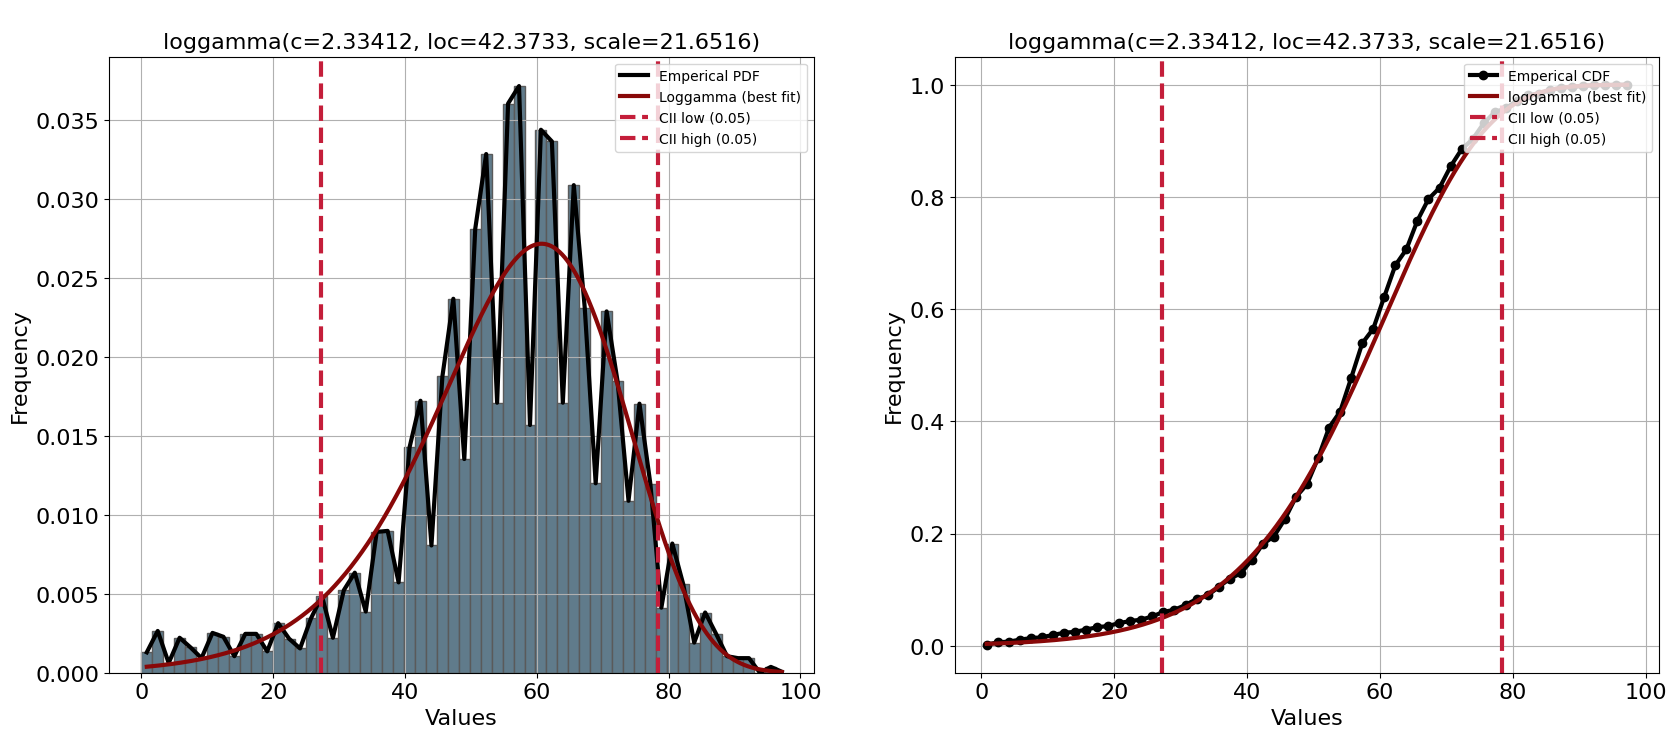

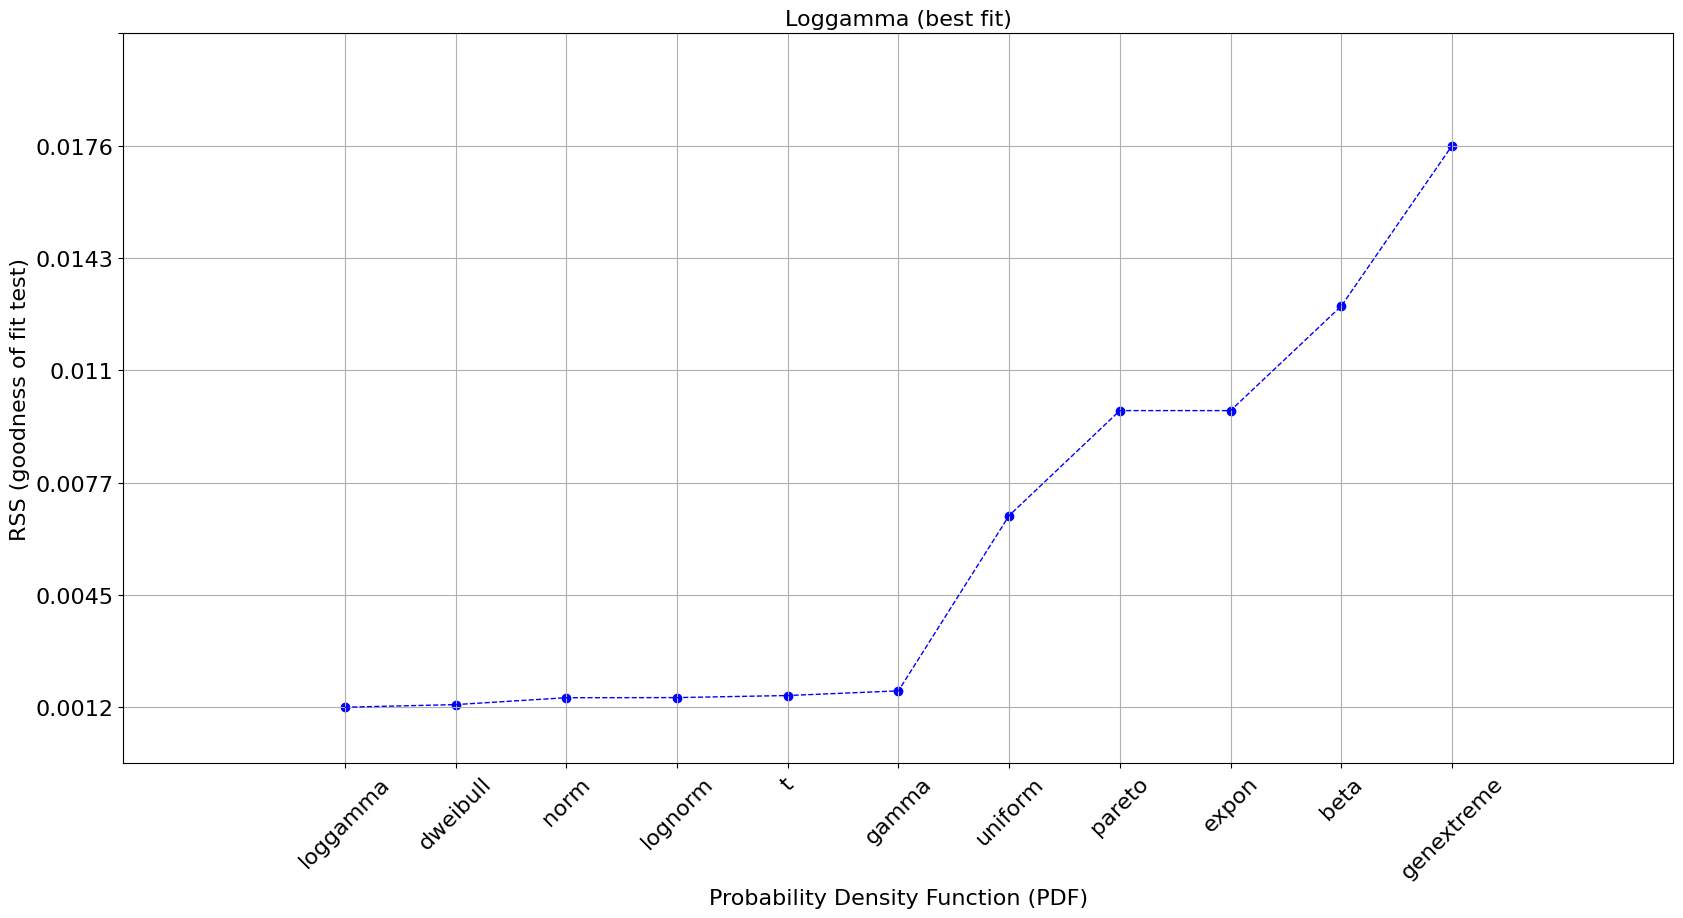

In [ ]:
#plot result
fig, ax = plt.subplots(1,2, figsize=(20, 8))
dist.plot(chart='PDF', ax=ax[0])
dist.plot(chart='CDF', ax=ax[1])
dist.plot_summary()

In [ ]:
#looping to count cdf value from age 0 to 115
y = np.empty(116)
for i in range(116):
    y[i]=loggamma.cdf(i,2.33412, loc=42.3733, scale=21.6516)

In [ ]:
#exporting the result
y=pd.DataFrame(y)
pd.DataFrame.to_clipboard(y)

In [ ]:
#determining the best fitting distribution for age of male patient
dist.fit_transform(female["age female"])

[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 0.00049679] [loc=55.001 scale=15.732]
[distfit] >INFO> [expon     ] [0.0 sec] [RSS: 0.00774015] [loc=0.000 scale=55.001]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 0.00774014] [loc=-34359738368.000 scale=34359738368.000]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.000670086] [loc=56.479 scale=13.068]
[distfit] >INFO> [t         ] [0.90 sec] [RSS: 0.000456281] [loc=55.094 scale=14.491]
[distfit] >INFO> [genextreme] [0.94 sec] [RSS: 0.0139455] [loc=97.721 scale=1.739]
[distfit] >INFO> [gamma     ] [0.25 sec] [RSS: 0.000595808] [loc=-197.273 scale=1.045]
[distfit] >INFO> [lognorm   ] [0.26 sec] [RSS: 0.000506114] [loc=-3691.878 scale=3746.805]
[distfit] >INFO> [beta      ] [0.66 sec] [RSS: 0.000461309] [loc=-69314462.469 scale=69314582.380]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00499864] [loc=0.000 scale=98.000]
[distfit

{'model': {'name': 'loggamma',
  'score': 0.00045448872407373106,
  'loc': 15.365162544787454,
  'scale': 30.29703866775497,
  'arg': (4.1884289998908,),
  'params': (4.1884289998908, 15.365162544787454, 30.29703866775497),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1e1f1872ed0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 27.17108256268134,
  'CII_max_alpha': 78.44618754533357},
 'summary':           name     score              loc               scale   
 0     loggamma  0.000454        15.365163           30.297039  \
 1            t  0.000456        55.093835           14.491159   
 2         beta  0.000461 -69314462.469372     69314582.380478   
 3         norm  0.000497        55.000518           15.731777   
 4      lognorm  0.000506     -3691.878123         3746.804713   
 5        gamma  0.000596      -197.273362            1.045183   
 6     dweibull   0.00067        56.478891           13.068467   
 7

In [ ]:
#printing the summary
print(dist.summary)

          name     score              loc               scale   
0     loggamma  0.000454        15.365163           30.297039  \
1            t  0.000456        55.093835           14.491159   
2         beta  0.000461 -69314462.469372     69314582.380478   
3         norm  0.000497        55.000518           15.731777   
4      lognorm  0.000506     -3691.878123         3746.804713   
5        gamma  0.000596      -197.273362            1.045183   
6     dweibull   0.00067        56.478891           13.068467   
7      uniform  0.004999              0.0                98.0   
8       pareto   0.00774   -34359738368.0  34359738367.999996   
9        expon   0.00774              0.0           55.000518   
10  genextreme  0.013945        97.721096            1.738967   

                                        arg   
0                        (4.1884289998908,)  \
1                     (13.117364487274685,)   
2   (18221967.10480277, 17.064226150722654)   
3                              

[distfit] >INFO> Create PDF plot for the parametric method.


[distfit] >INFO> Estimated distribution: Loggamma(loc:15.365163, scale:30.297039)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF
[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Loggamma (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

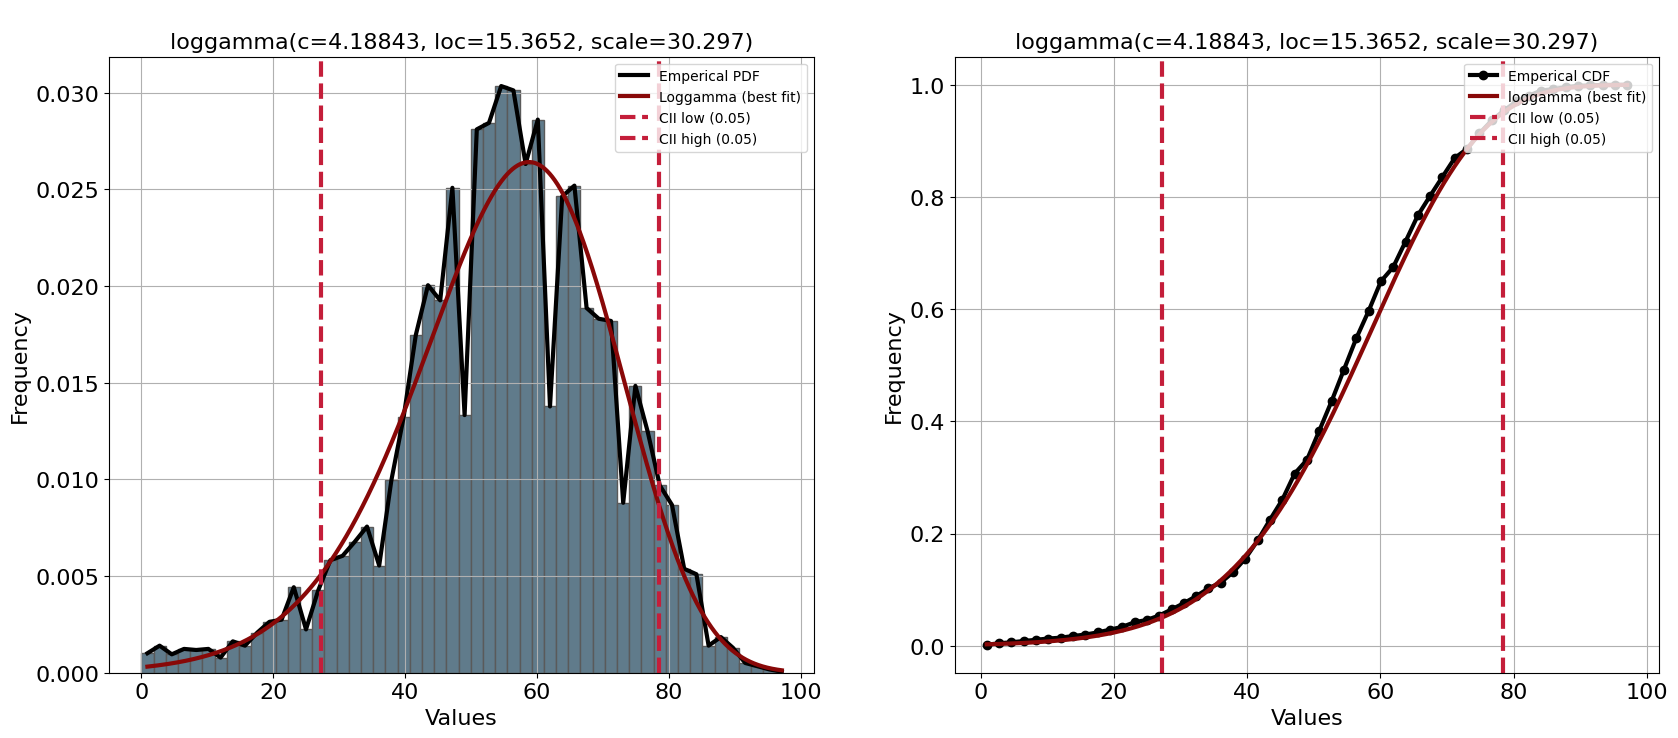

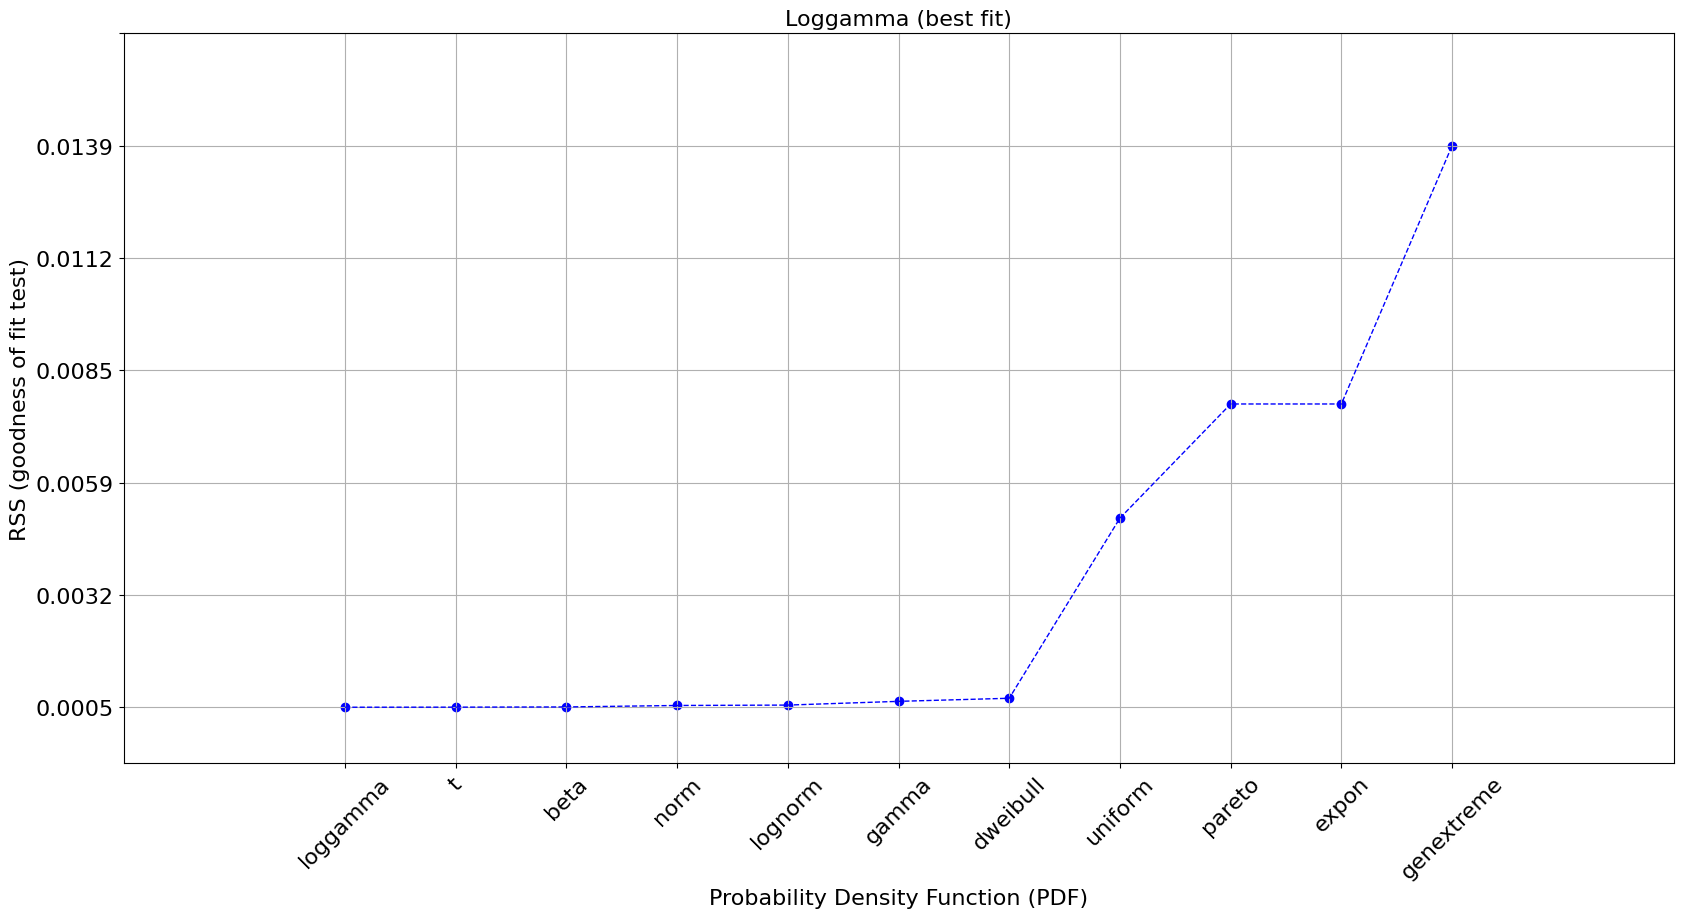

In [ ]:
#plot result
fig, ax = plt.subplots(1,2, figsize=(20, 8))
dist.plot(chart='PDF', ax=ax[0])
dist.plot(chart='CDF', ax=ax[1])
dist.plot_summary()

In [ ]:
#looping to count cdf value from age 0 to 115
x=np.empty(116)
for i in range(116):
    x[i]=loggamma.cdf(i,4.18843,loc=15.3652, scale = 30.297)


In [ ]:
#exporting the result
x=pd.DataFrame(x)
pd.DataFrame.to_clipboard(x)